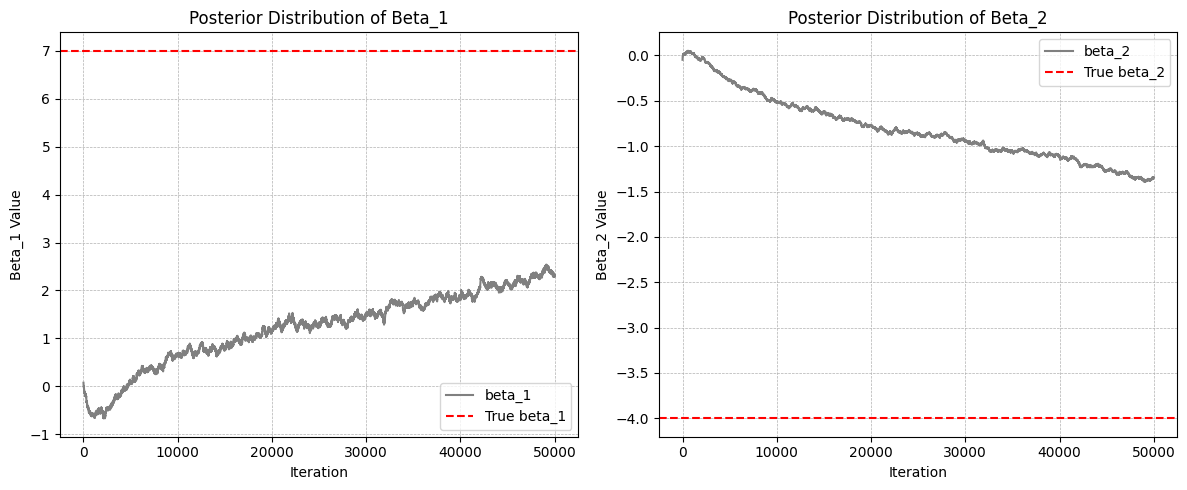

True beta: [ 4  7 -4]
MPE beta: [-8.48234699  1.21996262 -0.81039357]


In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def visualize_beta_posterior(file_path, beta_true):
    # ファイルを開く際にロックを回避するオプションを使用
    with h5py.File(file_path, 'r', libver='latest', swmr=True) as f:
        beta_samples = f['beta_samples'][:]
    
    # beta_samplesのうち、まだ0のままになっている部分は削除
    beta_samples = beta_samples[beta_samples[:, 0] != 0]

    # ベータの事後分布のプロット
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(beta_samples[:, 1], c='grey', label='beta_1')
    plt.axhline(y=beta_true[1], color='r', linestyle='--', label='True beta_1')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title('Posterior Distribution of Beta_1')
    plt.xlabel('Iteration')
    plt.ylabel('Beta_1 Value')
    
    plt.subplot(1, 2, 2)
    plt.plot(beta_samples[:, 2], c='grey', label='beta_2')
    plt.axhline(y=beta_true[2], color='r', linestyle='--', label='True beta_2')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title('Posterior Distribution of Beta_2')
    plt.xlabel('Iteration')
    plt.ylabel('Beta_2 Value')
    
    plt.tight_layout()
    plt.show()

    # MPE betaの計算
    burn_in = min(15, len(beta_samples) // 2)  # burn-in期間を15かサンプル数の半分のいずれか小さい方に設定
    beta_mpe = beta_samples[burn_in:].mean(axis=0)
    print(f"True beta: {beta_true}")
    print(f"MPE beta: {beta_mpe}")

# 使用例
file_path = "output/beta_samples.h5"
beta_true = np.array([4, 7, -4])  # 真のベータ値

try:
    visualize_beta_posterior(file_path, beta_true)
except Exception as e:
    print(f"エラーが発生しました: {e}")
    print("ファイルにアクセスできない可能性があります。サンプリングプロセスが完了するまで待つか、プロセスを終了してください。")